# Assessment

Engenharia de Prompts para Ciência de Dados

Pedro Monteiro Vieira Bayma Azevedo

## Imports

In [33]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import matplotlib.pyplot as plt
import json

import requests
import pandas as pd

In [3]:
#loading api key
load_dotenv('.env')

True

In [ ]:
#genai.configure(api_key=os.environ["GEMINI_KEY"])

## Exercício 1

### Fazer por Último

## Exercício 2

![Claude](./images/2-Claude.png)

![Gemini](./images/2-Gemini.png)



![GPT](./images/2-GPT.png)

### Respostas

#### a

O Claude tem como principais vantagens suas características mais voltadas para tarefas complexas e analíticas, bem como tarefas que envolvam código e escrita. Como desvantagem podemos apontar o tamanho da janela de contexto que é menor que o de outros LLMs e atualmente estar em versão de testes.


O Gemini Pro tem como principal vantagem sua capacidade multimodal que lida bem com textos, imagens, etc, e o custo menor quando comparado por exemplo ao GPT 4o. Com desvantagem podemos apontar sua menos consistência nas respostas e na capaxidade de compreender com precisão comandos quando comparado com outros modelos.

Por fim, o GPT 4o tem como vantagens o tamanho de sua janela de contexto, bem como sua performance de forma geral, podendo atuar em vários contextos. Como desvantagem, temos o custo elevado quando comparado a outros modelos e a necessidade de assinatura.


#### b 

Todas as respostas foram corretas. A resposta do Claude e do GPT foram extremamente próximas, tanto em conteúdo quanto em tamanho e temas abordados. Por sua vez a resposta do Gemini foi mais abrangente incluindo outras informações e foi um pouco maior que as outras duas.

#### c

Eu elejo a respsota do Claude como a mais próxima do esperado por ter atendido melhor aos requisitos de ser curta e trazer conteúdo que descrevia bem, de forma mais geral, o papel da Câmara dos Deputados.

#### d

![GPT](./images/2-Yaml.png)




 

## Exercício 3

### a - código dentro do arquivo dataprep.py

### b

In [17]:
pizzaPrompt = """

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com os dados dos deputados do brasil. Nesses dados temos informação na coluna
siglaPartido, do partido de cada deputado. 

### Instrução
Favor gerar código em python que crie um gráfico de pizza com o total e o percentual de cada deputado por partido.
Utilize as bibliotecas pandas, e matplotlib.

No fim, o código deve salvar o gráfico em um arquivo png com o nome de "distribuicao_deputados.png" no diretório
existente docs utilizando o seguinte path: "docs/distribuicao_deputados.png"

Favor retornar somente o código em python sem nehum comentário adicional

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(pizzaPrompt)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o arquivo parquet esteja no mesmo diretório ou especifique o caminho completo
df = pd.read_parquet("deputados.parquet")

# Contagem de deputados por partido
partidos = df['siglaPartido'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

# Salvando o gráfico
plt.savefig("docs/distribuicao_deputados.png")

plt.show()

```



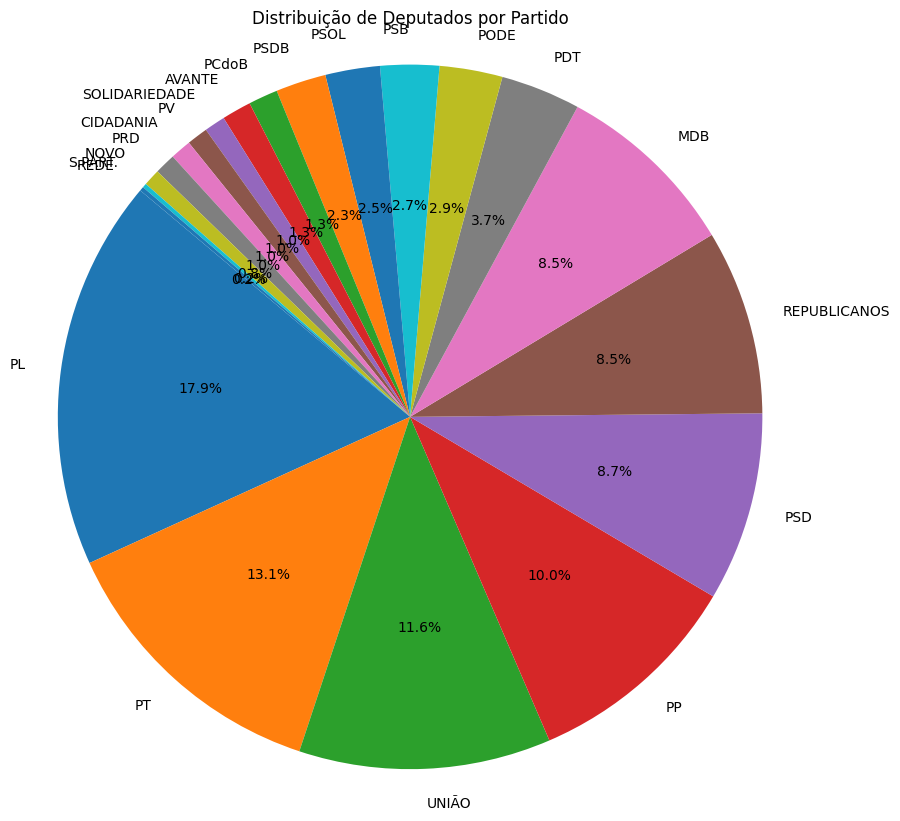

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o arquivo parquet esteja no mesmo diretório ou especifique o caminho completo
df = pd.read_parquet("./data/deputados.parquet")

# Contagem de deputados por partido
partidos = df['siglaPartido'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

# Salvando o gráfico
plt.savefig("docs/distribuicao_deputados.png")

plt.show()


### c

In [45]:
df = pd.read_parquet("./data/deputados.parquet")
partidos = df['siglaPartido'].value_counts()
partidos_texto = str(partidos.to_dict())




insightPartidosPrompt = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo texto com a distribuição dos deputados por partido.

### Instrução
Favor gerar insights a partir do dado {partidos_texto} sobre a distruibuição dos deputados por 
partido e como isso pode impactar o dia a dia da câmara dos deputados.

Favor retornar a análise em um formato json com a seguinte estrutura:
    
    ```json
    
        "insight1": "Insight 1",
        "insight2": "Insight 2",
        "insight3": "Insight 3"
    
    ```

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(insightPartidosPrompt)
print(response.text)

```json
{
  "insight1": "O PL detém uma posição de força significativa na Câmara dos Deputados, com 93 deputados, representando quase um terço do total.  Isso concede ao partido um poder considerável na aprovação de projetos de lei e na formação de alianças, potencialmente levando a uma agenda legislativa mais alinhada com suas prioridades e influenciando fortemente o rumo das votações.",
  "insight2": "A fragmentação partidária é evidente, com diversos partidos possuindo representações menores.  A presença de diversos partidos com poucos deputados (como NOVO, REDE, S.PART.) dificulta a formação de coalizões estáveis e pode resultar em maior instabilidade política e negociações mais complexas para a aprovação de propostas, demandando maior capacidade de articulação política dos líderes partidários.",
  "insight3": "O PT, apesar de ter uma expressiva bancada com 68 deputados, está em posição de oposição ao PL. A dinâmica entre esses dois partidos de grande porte moldará significativamen

In [ ]:
clean_response= response.text.replace("```json\n",'').replace("\n```",'')
insights = json.loads(clean_response)


with open("./data/insights_distribuicao_deputados.json", "w") as file:
    json.dump(insights, file, indent=4, ensure_ascii=False)


### Resposta

O prompt define a instrução a ser passada ao LLM e será formada por alguns componentes. A persona, um desses componentes é responsável por prover o papel e contextualizar o LLM com relação a como se portar e qual deve ser o foco de suas respostas junto ao usuário. Os dados servem como a base de informação que o LLM recebe para poder trabalhar e prover a resposta e por fim, os exemplos servem para demonstrar e contextualizar o LLM da maneira que a resposta deve ser dada, de forma a permitir que sejam respeitados padrões e formatos.

## Exercício 4

### a - código dentro do arquivo dataprep.py

### b

In [74]:
df_despesas = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet").sample(5)
despesas_texto = str(df_despesas.to_dict())
despesas_texto

"{'id': {1617: 141411, 4613: 220662, 4025: 141464, 5738: 178896, 857: 220605}, 'nome': {1617: 'Dagoberto Nogueira', 4613: 'Lucas Ramos', 4025: 'José Airton Félix Cirilo', 5738: 'Newton Cardoso Jr', 857: 'Bandeira de Mello'}, 'tipo_despesa': {1617: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 4613: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 4025: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 5738: 'COMBUSTÍVEIS E LUBRIFICANTES.', 857: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR'}, 'valor_documento': {1617: 900.0, 4613: 1100.0, 4025: 5558.24, 5738: 200.03, 857: 517.0}, 'data_documento': {1617: '2024-07-03T00:00:00', 4613: '2024-10-04T00:00:00', 4025: '2024-08-27T00:00:00', 5738: '2024-07-31T00:00:00', 857: '2024-07-17T00:00:00'}}"

In [76]:
df_despesas = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet").sample(5)
despesas_texto = str(df_despesas.to_dict())

prompt1 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor sugerir 3 análises simples que possam ser feitas somente com os dados das despesas dos deputados.

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt1)
print(response.text)

Com os dados fornecidos, podemos realizar algumas análises simples e descritivas.  Eis três sugestões:

**1. Despesa total por deputado:**

Esta análise visa determinar o total gasto por cada deputado.  Isso fornece uma visão geral imediata de quem teve as maiores despesas.

* **Método:** Agrupar os dados por `nome` e somar o `valor_documento` para cada deputado.
* **Resultado:** Uma tabela ou gráfico mostrando o nome de cada deputado e o total gasto por ele.  Essa análise pode ser complementada com a visualização de um gráfico de barras, ordenando os deputados pelo valor total gasto, para melhor percepção visual.
* **Interpretação:** Identifica os deputados com os maiores gastos, permitindo investigações posteriores sobre a natureza dessas despesas.

**2. Despesa média por tipo de despesa:**

Esta análise calcula a despesa média para cada `tipo_despesa`.  Isso ajuda a identificar quais tipos de despesas são mais caras em média.

* **Método:** Agrupar os dados por `tipo_despesa` e calc

In [83]:
prompt2 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor gerar o código python para a seguinte análise:

**1. Despesa total por deputado:**

Esta análise visa determinar o total gasto por cada deputado.  Isso fornece uma visão geral imediata de quem teve as maiores despesas.

* **Método:** Agrupar os dados por `nome` e somar o `valor_documento` para cada deputado.
* **Resultado:** Uma tabela ou gráfico mostrando o nome de cada deputado e o total gasto por ele.  Essa análise pode ser complementada com a visualização de um gráfico de barras, ordenando os deputados pelo valor total gasto, para melhor percepção visual.
* **Interpretação:** Identifica os deputados com os maiores gastos, permitindo investigações posteriores sobre a natureza dessas despesas.

### Requisitos:

O código python deve considerar que o arquivo parquet possui o seguinte path ./data/serie_despesas_diárias_deputados.parquet

O código deve salvar a tabela final em um arquivo csv com o nome "despesa_total_por_deputado.csv" no seguinte path existente 
em ./data/despesa_total_por_deputado.csv

O código deve mostrar o gráfico de barras com a análise.

A saída deve ser somente o código em python sem comentários adicionais.

"""


genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt2)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa total por deputado
despesa_total = df.groupby('nome')['valor_documento'].sum().reset_index()

# Salva a tabela em um arquivo CSV
despesa_total.to_csv('./data/despesa_total_por_deputado.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='nome', y='valor_documento', data=despesa_total, order=despesa_total.sort_values('valor_documento', ascending=False).nome)
plt.xticks(rotation=90)
plt.xlabel('Deputado')
plt.ylabel('Total Gasto')
plt.title('Despesa Total por Deputado')
plt.tight_layout()
plt.show()

```



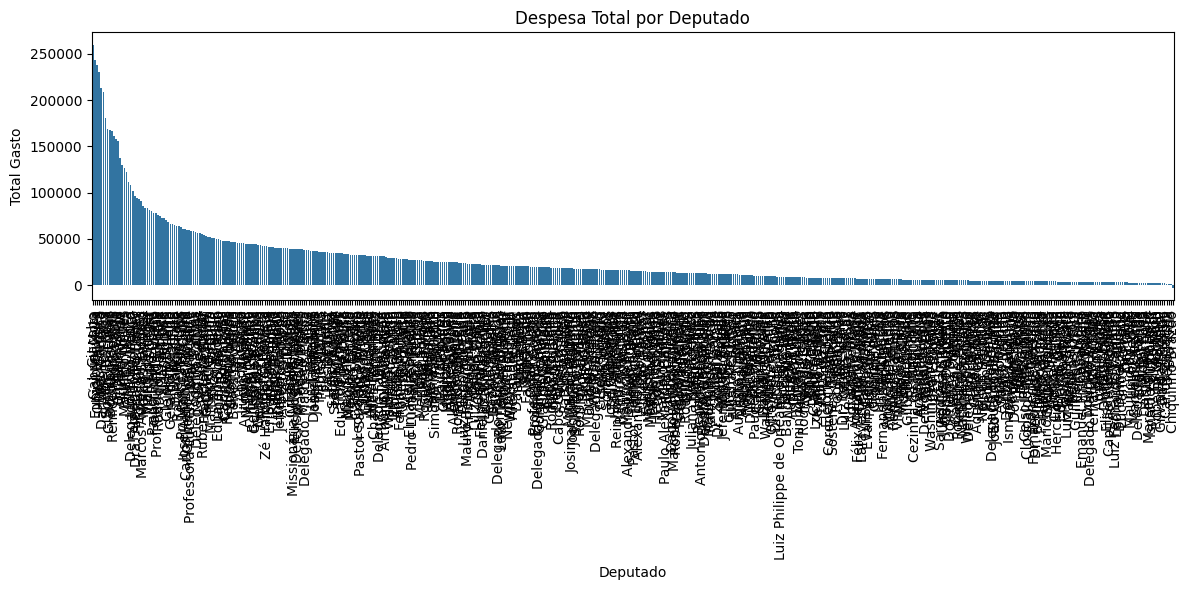

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa total por deputado
despesa_total = df.groupby('nome')['valor_documento'].sum().reset_index()

# Salva a tabela em um arquivo CSV
despesa_total.to_csv('./data/despesa_total_por_deputado.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='nome', y='valor_documento', data=despesa_total, order=despesa_total.sort_values('valor_documento', ascending=False).nome)
plt.xticks(rotation=90)
plt.xlabel('Deputado')
plt.ylabel('Total Gasto')
plt.title('Despesa Total por Deputado')
plt.tight_layout()
plt.show()

In [86]:
prompt3 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor gerar o código python para a seguinte análise:

**2. Despesa média por tipo de despesa:**

Esta análise calcula a despesa média para cada `tipo_despesa`.  Isso ajuda a identificar quais tipos de despesas são mais caras em média.

* **Método:** Agrupar os dados por `tipo_despesa` e calcular a média do `valor_documento` para cada grupo.
* **Resultado:** Uma tabela mostrando cada tipo de despesa e sua média de custo.  Um gráfico de barras seria também uma ótima visualização.
* **Interpretação:**  Permite identificar os tipos de despesas que consomem mais recursos em média, indicando possíveis áreas de otimização ou necessidade de maior transparência.

### Requisitos:

O código python deve considerar que o arquivo parquet possui o seguinte path ./data/serie_despesas_diárias_deputados.parquet

O código deve salvar a tabela final em um arquivo csv com o nome "despesa média por tipo de despesa.csv" no seguinte path existente 
em ./data/despesa_média_por_tipo_de_despesa.csv

O código deve mostrar o gráfico de barras com a análise.

A saída deve ser somente o código em python sem comentários adicionais.

"""


genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt3)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa média por tipo de despesa
despesa_media_por_tipo = df.groupby('tipo_despesa')['valor_documento'].mean().reset_index()

# Salva a tabela em um arquivo CSV
despesa_media_por_tipo.to_csv('./data/despesa_média_por_tipo_de_despesa.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='tipo_despesa', y='valor_documento', data=despesa_media_por_tipo)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de Despesa')
plt.ylabel('Despesa Média')
plt.title('Despesa Média por Tipo de Despesa')
plt.tight_layout()
plt.show()

```



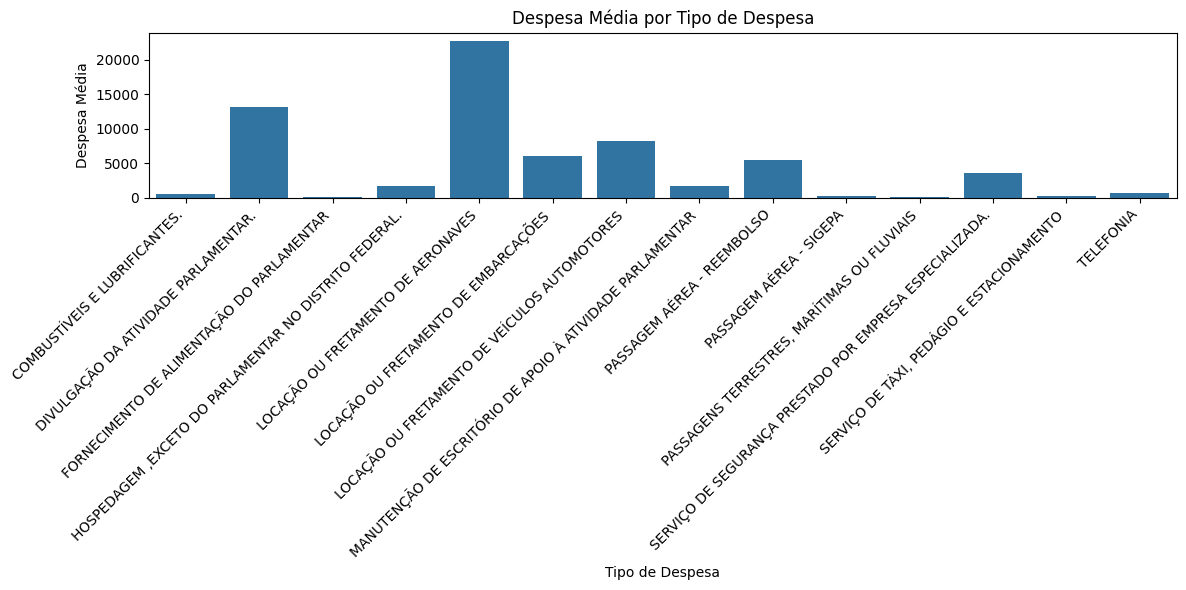

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa média por tipo de despesa
despesa_media_por_tipo = df.groupby('tipo_despesa')['valor_documento'].mean().reset_index()

# Salva a tabela em um arquivo CSV
despesa_media_por_tipo.to_csv('./data/despesa_média_por_tipo_de_despesa.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='tipo_despesa', y='valor_documento', data=despesa_media_por_tipo)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de Despesa')
plt.ylabel('Despesa Média')
plt.title('Despesa Média por Tipo de Despesa')
plt.tight_layout()
plt.show()


In [88]:
prompt4 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor gerar o código python para a seguinte análise:

**3. Distribuição das despesas ao longo do tempo:**

Esta análise explora a variação das despesas ao longo do tempo.

* **Método:**  Converter a coluna `data_documento` para um formato de data apropriado (se necessário) 
e então agregar as despesas por períodos (ex: mês, trimestre).  Podemos calcular a soma das despesas para cada período.
* **Resultado:** Uma tabela ou gráfico de linha mostrando a evolução das despesas totais ao longo do tempo. 
A granularidade (dia, mês, trimestre) deve ser escolhida de acordo com a quantidade de dados disponíveis.
### Requisitos:

O código python deve considerar que o arquivo parquet possui o seguinte path ./data/serie_despesas_diárias_deputados.parquet

O código deve salvar a tabela final em um arquivo csv com o nome "despesas_ao_longo_do_tempo.csv" no seguinte path existente 
em ./data/despesas_ao_longo_do_tempo.csv.csv

O código deve mostrar o gráfico com a análise.

A saída deve ser somente o código em python sem comentários adicionais.

"""


genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt4)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Converte a coluna 'data_documento' para datetime
df['data_documento'] = pd.to_datetime(df['data_documento'])

# Agrupa as despesas por mês e soma os valores
df['mes'] = df['data_documento'].dt.to_period('M')
despesas_mensais = df.groupby('mes')['valor_documento'].sum().reset_index()

# Converte o periodo para datetime para melhor visualização no gráfico
despesas_mensais['mes'] = despesas_mensais['mes'].dt.to_timestamp()

# Salva a tabela em um arquivo CSV
despesas_mensais.to_csv('./data/despesas_ao_longo_do_tempo.csv', index=False)

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='valor_documento', data=despesas_mensais)
plt.xlabel('Mês')
plt.ylabel('Total de Despesas')
plt.title('Distribuição das Despesas ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt

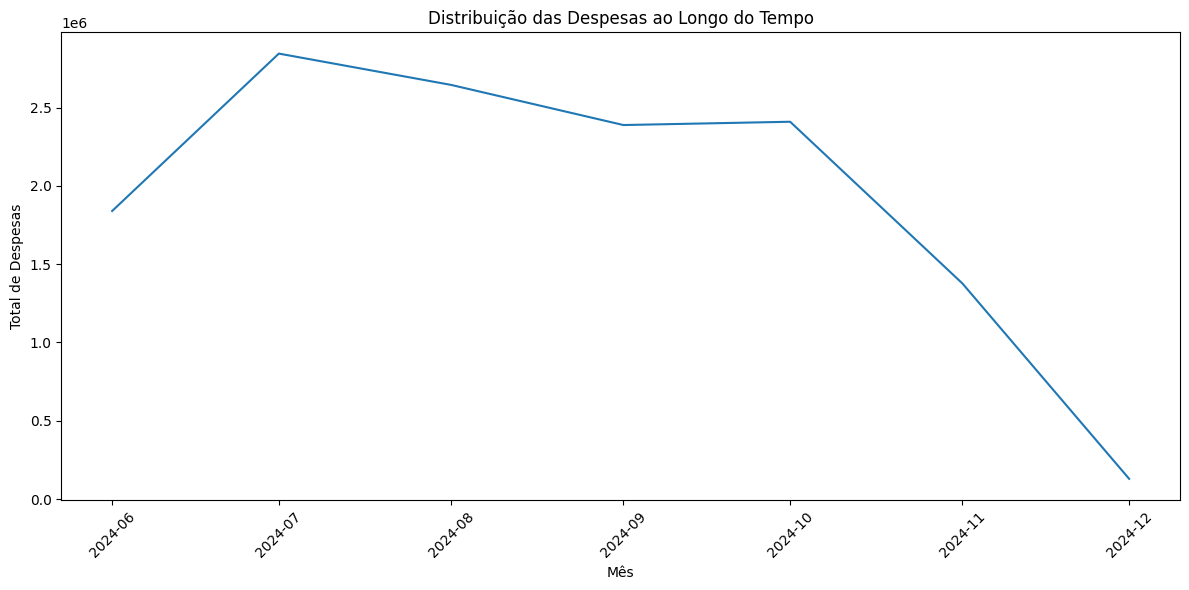

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Converte a coluna 'data_documento' para datetime
df['data_documento'] = pd.to_datetime(df['data_documento'])

# Agrupa as despesas por mês e soma os valores
df['mes'] = df['data_documento'].dt.to_period('M')
despesas_mensais = df.groupby('mes')['valor_documento'].sum().reset_index()

# Converte o periodo para datetime para melhor visualização no gráfico
despesas_mensais['mes'] = despesas_mensais['mes'].dt.to_timestamp()

# Salva a tabela em um arquivo CSV
despesas_mensais.to_csv('./data/despesas_ao_longo_do_tempo.csv', index=False)

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='valor_documento', data=despesas_mensais)
plt.xlabel('Mês')
plt.ylabel('Total de Despesas')
plt.title('Distribuição das Despesas ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()